
# Bank Customer Churn Analysis and Prediction

This notebook aims to analyze and predict customer churn for a bank. Customer churn refers to when customers or subscribers
stop doing business with a company or service. The dataset contains various features about bank customers and the target
variable indicates whether a customer left the bank (churn) or continued to be a customer.

Steps followed in this notebook:
1. Data Loading and Exploration
2. Data Processing
3. Handling Imbalanced Data using SMOTE
4. Data Splitting and Feature Scaling
5. Model Training and Evaluation
6. Conclusion and Model Saving

Let's dive into the analysis.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info

<bound method DataFrame.info of       customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  esti

In [4]:
df.describe(include='all')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


### Check For Missing Values

Before processing the data, it's crucial to check for any missing values and handle them accordingly.

In [5]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [6]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

### Dropping Irrelevant Features

Some features may not contribute to the model's predictive power. Here, we'll drop such features for simplicity.

In [7]:
df = df.drop(['customer_id'],axis=1)

In [8]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Encoding Categorical Data

Machine learning models require numerical input. Hence, we encode categorical variables into a format that's suitable for modeling.

In [9]:
df = pd.get_dummies(df,drop_first = True)

In [10]:
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Insights about Target Variable (Churn)

It's essential to understand the distribution of our target variable, as it gives insights about the class balance in the dataset.

In [11]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

<Axes: ylabel='count'>

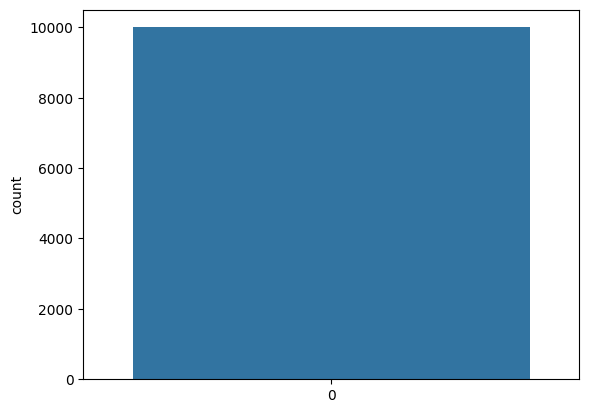

In [12]:
sns.countplot(df['churn'])

In [13]:
X = df.drop('churn',axis=1)
y = df['churn']

### Handling Imbalanced Data using SMOTE

Imbalanced datasets can lead to biased models. Here, we use the Synthetic Minority Oversampling Technique (SMOTE) to balance our dataset.

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [16]:
y_res.value_counts()

1    7963
0    7963
Name: churn, dtype: int64

<Axes: ylabel='count'>

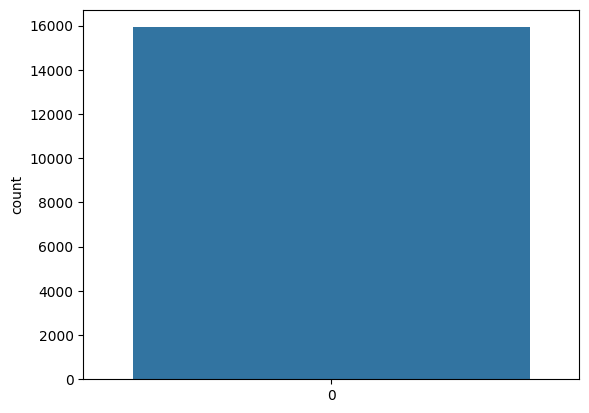

In [17]:
sns.countplot(y_res)

### Splitting The Dataset into Training and Test Set

To evaluate our model's performance, we'll split the data into a training set (to train the model) and a test set (to test the model).

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=50)

### Feature Scaling

Standardizing the range of independent variables allows models, especially distance-based ones, to perform better.

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()

In [22]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
X_train

array([[ 1.25666381,  2.00977844, -1.39835792, ...,  1.73592651,
        -0.46214119, -0.8433118 ],
       [-0.41800208,  1.50769955, -1.03190948, ..., -0.57606125,
        -0.46214119, -0.8433118 ],
       [ 1.22382722, -0.09895292, -1.39835792, ..., -0.57606125,
        -0.46214119, -0.8433118 ],
       ...,
       [-1.24986226, -1.00269494,  0.80033272, ..., -0.57606125,
        -0.46214119, -0.8433118 ],
       [ 1.50841097, -0.40020026,  0.80033272, ..., -0.57606125,
        -0.46214119,  1.18580103],
       [ 1.04869876,  0.50354175, -0.66546104, ..., -0.57606125,
        -0.46214119, -0.8433118 ]])

# **1. LOGISTIC REGRESSION**

In [24]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred1 = log.predict(X_test)

In [26]:
y_pred1

array([1, 1, 0, ..., 0, 0, 1])

**Accuracy**

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.7709693621295831

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

**Precision Score**

In [29]:
precision_score(y_test,y_pred1)

0.7699248120300752

**Recall Score**

In [30]:
recall_score(y_test,y_pred1)

0.7722473604826546

**f1 score**

In [31]:
f1_score(y_test,y_pred1)

0.7710843373493976

# **2. SVC**

In [32]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [33]:
y_pred2=svm.predict(X_test)

In [34]:
y_pred2

array([1, 1, 0, ..., 0, 0, 1])

**Accuracy**

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.8294826720241085

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

**Precision Score**

In [37]:
precision_score(y_test,y_pred2)

0.8338430173292558

**Recall**

In [38]:
recall_score(y_test,y_pred2)

0.8225238813474107

**f1 score**

In [39]:
f1_score(y_test,y_pred2)

0.8281447734750695

# **3. KNeighbors Classifier**

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [41]:
y_pred3=knn.predict(X_test)

In [42]:
y_pred3

array([1, 1, 0, ..., 0, 0, 1])

**Accuracy**

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.8294826720241085

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

**Precision**

In [45]:
precision_score(y_test,y_pred3)

0.7973503434739941

**Recall**

In [46]:
recall_score(y_test,y_pred3)

0.8169934640522876

**F1 Score**

In [47]:
f1_score(y_test,y_pred3)

0.8070523963248075

# **4. Decision Tree**

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
y_pred4=dt.predict(X_test)
y_pred4

array([1, 1, 0, ..., 0, 0, 1])

**Accuracy**

In [52]:
accuracy_score(y_test, y_pred4)

0.7830236062280261

**Precision**

In [53]:
precision_score(y_test, y_pred4)

0.7758705247670427

**Recall**

In [54]:
recall_score(y_test, y_pred4)

0.7953745600804424

**F1 Score**

In [55]:
f1_score(y_test,y_pred4)

0.785501489572989

# **5. Random Forest Classifier**

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
y_pred5=rf.predict(X_test)

In [58]:
y_pred5

array([1, 1, 0, ..., 0, 0, 1])

**Accuracy Score**

In [59]:
accuracy_score(y_test,y_pred5)

0.847564038171773

**Precision Score**

In [60]:
precision_score(y_test, y_pred5)

0.8493427704752275

**Recall**

In [61]:
recall_score(y_test, y_pred5)

0.8446455505279035

**F1 Score**

In [62]:
f1_score(y_test,y_pred5)

0.8469876480967986

# **6. Gradient Boost**

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [64]:
y_pred6=gbc.predict(X_test)

In [65]:
y_pred6

array([1, 1, 0, ..., 0, 0, 1])

**Accuracy**

In [66]:
accuracy_score(y_test,y_pred6)

0.8319939728779507

**Precision**

In [67]:
precision_score(y_test, y_pred6)

0.8377686796315251

**Recall**

In [68]:
recall_score(y_test, y_pred6)

0.8230266465560583

**F1 Score**

In [69]:
f1_score(y_test,y_pred6)

0.8303322343393356

# **7. XGBoost**

In [70]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(random_state=42, verbosity = 0)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [71]:
y_pred7=model_xgb.predict(X_test)

**Accuracy**

In [72]:
accuracy_score(y_test,y_pred7)

0.8505775991963838

**Precision**

In [73]:
precision_score(y_test,y_pred7)

0.8523761375126391

**Recall**

In [74]:
recall_score(y_test,y_pred7)

0.8476621417797888

**F1 Score**

In [75]:
f1_score(y_test,y_pred7)

0.8500126039828586

# **Accuracy Summary**

In [76]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'ACC':[accuracy_score(y_test,y_pred1),
           accuracy_score(y_test,y_pred2),
           accuracy_score(y_test,y_pred3),
           accuracy_score(y_test,y_pred4),
           accuracy_score(y_test,y_pred5),
           accuracy_score(y_test,y_pred6),
           accuracy_score(y_test,y_pred7)
          ]
})

In [78]:
performance_summary

,Model,ACC
0,LR,0.770969
1,SVC,0.829483
2,KNN,0.804872
3,DT,0.783024
4,RF,0.847564
5,GBC,0.831994
6,XGB,0.850578


<Axes: xlabel='Model', ylabel='ACC'>

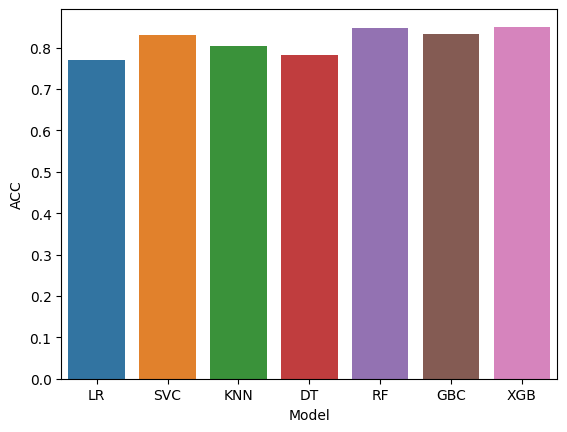

In [80]:
sns.barplot(x=performance_summary['Model'],y=performance_summary['ACC'])

In [81]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'PRECISION':[precision_score(y_test,y_pred1),
           precision_score(y_test,y_pred2),
           precision_score(y_test,y_pred3),
           precision_score(y_test,y_pred4),
           precision_score(y_test,y_pred5),
           precision_score(y_test,y_pred6),
            precision_score(y_test,y_pred6)
          ]
})

In [82]:
performance_summary

,Model,PRECISION
0,LR,0.769925
1,SVC,0.833843
2,KNN,0.797350
3,DT,0.775871
4,RF,0.849343
5,GBC,0.837769
6,XGB,0.837769


<Axes: xlabel='Model', ylabel='PRECISION'>

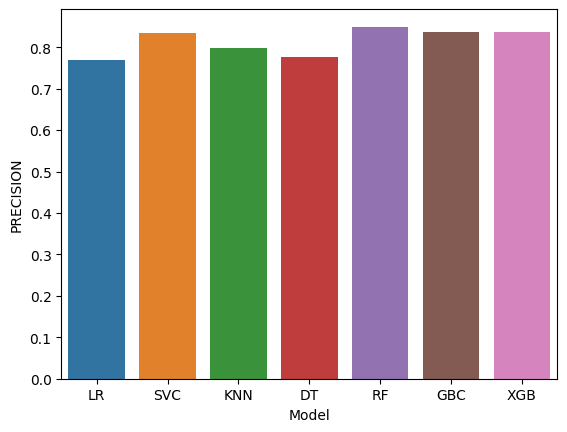

In [84]:
sns.barplot(x=performance_summary['Model'],y=performance_summary['PRECISION'])

### Saving the Best Model (XGBoost)

After evaluating all models, we found XGBoost to be the best performing model. Here, we save it for future use.

**Saving the best model, XGBoost**

In [85]:
X_train = sc.fit_transform(X_train)

In [86]:
model_xgb.fit(X_res,y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [87]:
import joblib

In [88]:
joblib.dump(model_xgb, 'churn_predict_model')

['churn_predict_model']

In [89]:
model = joblib.load('churn_predict_model')

In [90]:
df.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn',
       'country_Germany', 'country_Spain', 'gender_Male'],
      dtype='object')

# Results
**We ran 7 models on this dataset and among all the 7,  XGBoost has the highest accuracy of 85.05% and Random Forest has the highest precision of 84.90%**


# Conclusion

After analyzing the dataset and training multiple models, the XGBoost (XGB) emerged as the top-performing model in terms of accuracy. Meanwhile, the Random Forest (RF) model exhibited the highest precision. For the given problem, depending on the business need (i.e., whether to prioritize overall correct predictions or to be more precise in predicting positive cases), either of these models can be chosen.
